In [1]:
# módulos básicos
import numpy as np
import pandas as pd

# módulos para visualização
import matplotlib.pyplot as plt

# módulo para modelagem de redes neurais
import tensorflow as tf

# funções customizadas

## função para geração de inputs e seus respectivos outputs dos modelos
from data_preparation_functions import model_in_out_generator

## função de regra de detecção dynamic error thresholding
from fault_detection_functions import dynamic_error_threshold

## função para análise de resultados
from results_analysis_functions import detection_results

# Parâmetros

**Input data**

In [2]:
INPUT_WIDTH = 1

**Detecção**

In [3]:
H = 1000
ALPHA = 0.1

# Treinamento

### Dados de treinamento

In [4]:
df_train = pd.read_csv('datasets/confidencial/df_train.csv', delimiter=',')
df_train.head()

,timestamp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,fault
0,2021-06-01 00:00:00,4.820679,5.008938,27.880791,28.154675,0.956431,0.55,100.0,8539.384766,1370.217407,1.731934,1.215717,542.562378,542.937134,50.184551,333.826599,3999.373047,39.244167,0
1,2021-06-01 00:01:00,4.820952,5.008938,28.111809,28.127951,0.951423,0.55,100.0,8511.902344,1368.905762,1.731030,1.212713,542.260864,542.937134,50.396320,333.844940,3994.509277,39.245514,0
2,2021-06-01 00:02:00,4.821226,5.008938,28.071926,28.101227,0.961223,0.55,100.0,8483.062500,1369.733887,1.731332,1.215683,542.770996,542.937134,50.418854,333.552643,4005.993164,39.246860,0
3,2021-06-01 00:03:00,4.821499,5.008938,27.736803,28.074503,0.951415,0.55,100.0,8445.349609,1368.666870,1.730829,1.219262,542.977905,542.937134,50.365505,333.465454,3995.365967,39.248207,0
4,2021-06-01 00:04:00,4.821773,5.008938,27.485134,28.047777,0.951445,0.55,100.0,8418.049805,1368.864868,1.731332,1.218987,542.794250,542.945679,50.420170,333.637848,4000.796143,39.249554,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20161 entries, 0 to 20160
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  20161 non-null  object 
 1   x1         20161 non-null  float64
 2   x2         20161 non-null  float64
 3   x3         20161 non-null  float64
 4   x4         20161 non-null  float64
 5   x5         20161 non-null  float64
 6   x6         20161 non-null  float64
 7   x7         20161 non-null  float64
 8   x8         20161 non-null  float64
 9   x9         20161 non-null  float64
 10  x10        20161 non-null  float64
 11  x11        20161 non-null  float64
 12  x12        20161 non-null  float64
 13  x13        20161 non-null  float64
 14  x14        20161 non-null  float64
 15  x15        20161 non-null  float64
 16  x16        20161 non-null  float64
 17  x17        20161 non-null  float64
 18  fault      20161 non-null  int64  
dtypes: float64(17), int64(1), object(1)
memory usa

### Pré-processamento dos dados de treinamento

In [6]:
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20161 entries, 0 to 20160
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  20161 non-null  datetime64[ns]
 1   x1         20161 non-null  float64       
 2   x2         20161 non-null  float64       
 3   x3         20161 non-null  float64       
 4   x4         20161 non-null  float64       
 5   x5         20161 non-null  float64       
 6   x6         20161 non-null  float64       
 7   x7         20161 non-null  float64       
 8   x8         20161 non-null  float64       
 9   x9         20161 non-null  float64       
 10  x10        20161 non-null  float64       
 11  x11        20161 non-null  float64       
 12  x12        20161 non-null  float64       
 13  x13        20161 non-null  float64       
 14  x14        20161 non-null  float64       
 15  x15        20161 non-null  float64       
 16  x16        20161 non-null  float64      

In [7]:
X_train, X_train_timestamps, Y_train, Y_train_timestamps, Y_train_label = model_in_out_generator(df_train, input_width=INPUT_WIDTH, input_features=['x1'], label_features=['x1'])

100%|██████████████████████████████████████████████████████████████████████████| 20160/20160 [00:18<00:00, 1082.94it/s]

X shape: (20160, 1, 1)
X_timestamps shape: (20160,)
Y shape: (20160, 1)
Y_timestamps shape: (20160,)
Y_label shape: (20160,)


In [8]:
# X_train = np.squeeze(X_train, axis=-1)
# X_train = np.expand_dims(X_train, axis=1)
# X_train.shape

### Modelo LSTM

In [9]:
rnn = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2]) , activation='relu', return_sequences=False),
    tf.keras.layers.Dense(units=1)
])
rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Treinamento do modelo 

In [10]:
rnn.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam())
history = rnn.fit(X_train, Y_train, epochs=25, batch_size=32, shuffle=False)

Epoch 1/25
630/630 [==============================] - 0s 612us/step - loss: 5.0335
Epoch 2/25
630/630 [==============================] - 0s 708us/step - loss: 0.0026
Epoch 3/25
630/630 [==============================] - 0s 572us/step - loss: 0.0026
Epoch 4/25
630/630 [==============================] - 0s 705us/step - loss: 0.0026
Epoch 5/25
630/630 [==============================] - 1s 1ms/step - loss: 0.0025
Epoch 6/25
630/630 [==============================] - 0s 715us/step - loss: 0.0023
Epoch 7/25
630/630 [==============================] - 0s 654us/step - loss: 0.0021
Epoch 8/25
630/630 [==============================] - 1s 965us/step - loss: 0.0017
Epoch 9/25
630/630 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 10/25
630/630 [==============================] - 0s 737us/step - loss: 9.5145e-04
Epoch 11/25
630/630 [==============================] - 0s 620us/step - loss: 6.5374e-04
Epoch 12/25
630/630 [==============================] - 0s 565us/step - loss: 4.37

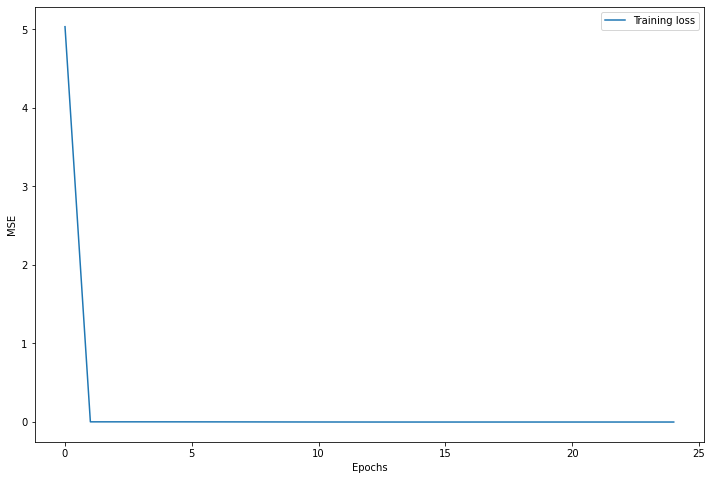

In [11]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [12]:
Y_train_pred = rnn.predict(X_train)
# Y_train_pred = np.squeeze(Y_train_pred, axis=-1)
train_mae_loss = np.abs(Y_train_pred - Y_train)
train_mae_loss.shape

(20160, 1)

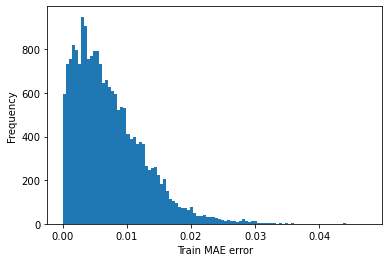

In [13]:
mae_train = np.abs(Y_train_pred - Y_train)

plt.hist(mae_train, bins=100)
plt.xlabel('Train MAE error')
plt.ylabel('Frequency')
plt.show()

# Teste

### Dados de teste 1

In [14]:
df_test1 = pd.read_csv('datasets/confidencial/df_test1.csv', delimiter=',')
df_test1.head()

,timestamp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,fault
0,2011-05-15 00:00:00,4.774647,5.0,41.235447,41.054737,0.711813,0.4,100.0,9113.216797,1001.702148,1.620825,1.281797,534.477234,534.429382,48.674740,250.269608,4518.571289,31.947456,0
1,2011-05-15 00:01:00,4.775790,5.0,41.030991,41.056587,0.706777,0.4,100.0,9088.170898,999.734985,1.622454,1.281679,534.487915,534.448791,48.673882,250.622223,4507.051758,31.944284,0
2,2011-05-15 00:02:00,4.776933,5.0,41.322945,41.058437,0.712554,0.4,100.0,9088.625000,999.797058,1.621738,1.281561,534.435059,534.463928,48.700249,250.930069,4528.894043,31.941114,0
3,2011-05-15 00:03:00,4.778075,5.0,40.994583,41.060284,0.717025,0.4,100.0,9159.108398,1001.367004,1.620782,1.281442,534.640808,534.490112,48.613491,251.214172,4543.851074,31.937942,0
4,2011-05-15 00:04:00,4.779218,5.0,41.411636,41.062134,0.693954,0.4,100.0,9169.337891,1003.351440,1.619820,1.281324,534.741455,534.510681,48.550117,251.337784,4528.670898,31.934771,0


In [15]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14401 entries, 0 to 14400
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  14401 non-null  object 
 1   x1         14401 non-null  float64
 2   x2         14401 non-null  float64
 3   x3         14401 non-null  float64
 4   x4         14401 non-null  float64
 5   x5         14401 non-null  float64
 6   x6         14401 non-null  float64
 7   x7         14401 non-null  float64
 8   x8         14401 non-null  float64
 9   x9         14401 non-null  float64
 10  x10        14401 non-null  float64
 11  x11        14401 non-null  float64
 12  x12        14401 non-null  float64
 13  x13        14401 non-null  float64
 14  x14        14401 non-null  float64
 15  x15        14401 non-null  float64
 16  x16        14401 non-null  float64
 17  x17        14401 non-null  float64
 18  fault      14401 non-null  int64  
dtypes: float64(17), int64(1), object(1)
memory usa

### Pré-processamento dos dados de teste 1

In [16]:
df_test1['timestamp'] = pd.to_datetime(df_test1['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14401 entries, 0 to 14400
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  14401 non-null  datetime64[ns]
 1   x1         14401 non-null  float64       
 2   x2         14401 non-null  float64       
 3   x3         14401 non-null  float64       
 4   x4         14401 non-null  float64       
 5   x5         14401 non-null  float64       
 6   x6         14401 non-null  float64       
 7   x7         14401 non-null  float64       
 8   x8         14401 non-null  float64       
 9   x9         14401 non-null  float64       
 10  x10        14401 non-null  float64       
 11  x11        14401 non-null  float64       
 12  x12        14401 non-null  float64       
 13  x13        14401 non-null  float64       
 14  x14        14401 non-null  float64       
 15  x15        14401 non-null  float64       
 16  x16        14401 non-null  float64      

In [17]:
X_test1, X_test1_timestamps, Y_test1, Y_test1_timestamps, Y_test1_label = model_in_out_generator(df_test1, input_width=INPUT_WIDTH, input_features=['x1'], label_features=['x1'])

100%|███████████████████████████████████████████████████████████████████████████| 14400/14400 [00:16<00:00, 865.99it/s]

X shape: (14400, 1, 1)
X_timestamps shape: (14400,)
Y shape: (14400, 1)
Y_timestamps shape: (14400,)
Y_label shape: (14400,)


In [18]:
# X_test1 = np.squeeze(X_test1, axis=-1)
# X_test1 = np.expand_dims(X_test1, axis=1)
# X_test1.shape

### Teste 1 do modelo

In [19]:
Y_test1_pred = rnn.predict(X_test1)
print(f'Y_test1_pred shape: {Y_test1_pred.shape}')

Y_test1_pred shape: (14400, 1)


### Detecção das falhas no conjunto de dados de teste 1

In [20]:
mae_test1 = np.abs(Y_test1_pred - Y_test1)
mae_test1 = np.squeeze(mae_test1, axis=-1)
df_test1_detect = dynamic_error_threshold(Y_test1_timestamps, Y_test1, Y_test1_pred, mae_test1, Y_test1_label, h=H, alpha=ALPHA)

Error windows shape: (13400, 1001)
EWMA error windows shape: (13400, 1001)


D:\Projects\0-master\2-fcc-fault-detection\fault_detection_functions.py:91: RuntimeWarning: invalid value encountered in double_scalars
  arg = ((delta_mu / mu) + (delta_sigma / sigma)) / (e_a + E_seq**2)


Thresholds shape: (13400,)


### Resultados do teste 1

In [21]:
test1_results = detection_results(df_test1_detect)

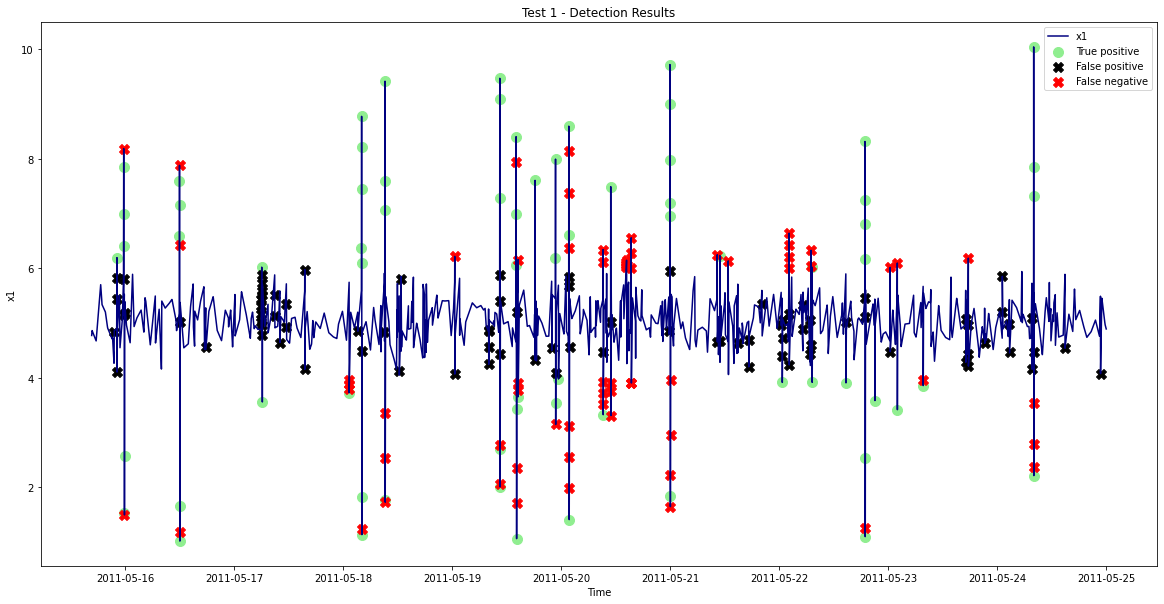

In [22]:
test1_results.detection_result_plot('Test 1 - Detection Results', 'Time', 'x1')

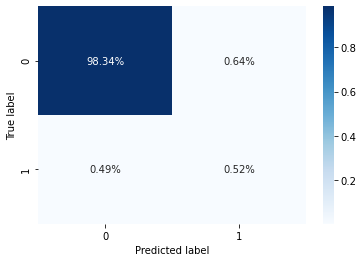

In [23]:
cfm_test1 = test1_results.detection_confusion_matrix()

In [24]:
test1_results.detection_result_metrics()

Detection performance metrics:

True negative: 13178
False positive: 86
False negative: 66
True positive: 70
True positive rate (TPR): 0.5147058823529411
True negative rate (TNR): 0.9935162846803377
False positive rate (FPR): 0.006483715319662244
Precision: 0.44871794871794873
Accuracy: 0.9886567164179104
Balanced accuracy: 0.7541110835166394
F1 score: 0.4794520547945206


### Dados de teste 2

In [25]:
df_test2 = pd.read_csv('datasets/confidencial/df_test2.csv', delimiter=',')
df_test2.head()

,timestamp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,fault
0,2012-04-01 00:00:00,4.241906,5.038079,41.330364,41.884705,0.785922,0.4,100.0,9203.445313,1000.187256,1.510093,1.188423,538.560120,538.563660,44.496689,273.757263,4549.782227,31.182013,0
1,2012-04-01 00:01:00,4.282500,5.038079,40.937592,41.895687,0.800040,0.4,100.0,9206.594727,1000.715393,1.510778,1.188279,538.491943,538.573059,44.499447,273.931152,4549.725586,31.180729,0
2,2012-04-01 00:02:00,4.294424,5.038079,41.556946,41.906670,0.761630,0.4,100.0,9209.744141,998.984009,1.510941,1.188135,538.887451,538.582459,44.474369,274.256867,4549.668457,31.179445,0
3,2012-04-01 00:03:00,4.306348,5.038079,41.592968,41.917652,0.757114,0.4,100.0,9212.893555,998.743164,1.510920,1.187991,538.784302,538.588379,44.415276,274.679749,4549.611328,31.178162,0
4,2012-04-01 00:04:00,4.318272,5.038079,41.646286,41.928631,0.756584,0.4,100.0,9216.043945,999.936157,1.511907,1.187846,538.687256,538.590576,44.367886,274.962402,4549.532715,31.176878,0


In [26]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12961 entries, 0 to 12960
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  12961 non-null  object 
 1   x1         12961 non-null  float64
 2   x2         12961 non-null  float64
 3   x3         12961 non-null  float64
 4   x4         12961 non-null  float64
 5   x5         12961 non-null  float64
 6   x6         12961 non-null  float64
 7   x7         12961 non-null  float64
 8   x8         12961 non-null  float64
 9   x9         12961 non-null  float64
 10  x10        12961 non-null  float64
 11  x11        12961 non-null  float64
 12  x12        12961 non-null  float64
 13  x13        12961 non-null  float64
 14  x14        12961 non-null  float64
 15  x15        12961 non-null  float64
 16  x16        12961 non-null  float64
 17  x17        12961 non-null  float64
 18  fault      12961 non-null  int64  
dtypes: float64(17), int64(1), object(1)
memory usa

### Pré-processamento dos dados de teste 2

In [27]:
df_test2['timestamp'] = pd.to_datetime(df_test2['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12961 entries, 0 to 12960
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  12961 non-null  datetime64[ns]
 1   x1         12961 non-null  float64       
 2   x2         12961 non-null  float64       
 3   x3         12961 non-null  float64       
 4   x4         12961 non-null  float64       
 5   x5         12961 non-null  float64       
 6   x6         12961 non-null  float64       
 7   x7         12961 non-null  float64       
 8   x8         12961 non-null  float64       
 9   x9         12961 non-null  float64       
 10  x10        12961 non-null  float64       
 11  x11        12961 non-null  float64       
 12  x12        12961 non-null  float64       
 13  x13        12961 non-null  float64       
 14  x14        12961 non-null  float64       
 15  x15        12961 non-null  float64       
 16  x16        12961 non-null  float64      

In [28]:
X_test2, X_test2_timestamps, Y_test2, Y_test2_timestamps, Y_test2_label = model_in_out_generator(df_test2, input_width=INPUT_WIDTH, input_features=['x1'], label_features=['x1'])

100%|███████████████████████████████████████████████████████████████████████████| 12960/12960 [00:13<00:00, 965.22it/s]

X shape: (12960, 1, 1)
X_timestamps shape: (12960,)
Y shape: (12960, 1)
Y_timestamps shape: (12960,)
Y_label shape: (12960,)


In [29]:
# X_test2 = np.squeeze(X_test2, axis=-1)
# X_test2 = np.expand_dims(X_test2, axis=1)
# X_test2.shape

### Teste 2 do modelo

In [30]:
Y_test2_pred = rnn.predict(X_test2)
# Y_test2_pred = np.squeeze(Y_test2_pred, axis=-1)
print(f'Y_test2_pred shape: {Y_test2_pred.shape}')

Y_test2_pred shape: (12960, 1)


### Detecção das falhas no conjunto de dados de teste 2

In [31]:
mae_test2 = np.abs(Y_test2_pred - Y_test2)
mae_test2 = np.squeeze(mae_test2, axis=-1)
df_test2_detect = dynamic_error_threshold(Y_test2_timestamps, Y_test2, Y_test2_pred, mae_test2, Y_test2_label, h=H, alpha=ALPHA)

Error windows shape: (11960, 1001)
EWMA error windows shape: (11960, 1001)


D:\Projects\0-master\2-fcc-fault-detection\fault_detection_functions.py:91: RuntimeWarning: invalid value encountered in double_scalars
  arg = ((delta_mu / mu) + (delta_sigma / sigma)) / (e_a + E_seq**2)


Thresholds shape: (11960,)


### Resultados do teste 2

In [32]:
test2_results = detection_results(df_test2_detect)

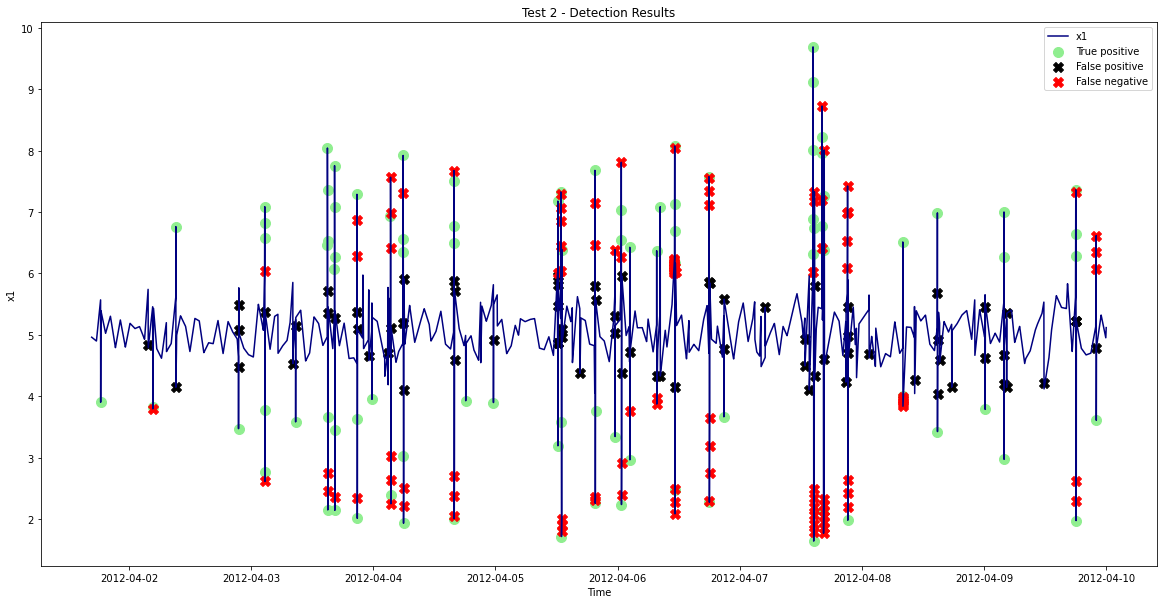

In [33]:
test2_results.detection_result_plot('Test 2 - Detection Results', 'Time', 'x1')

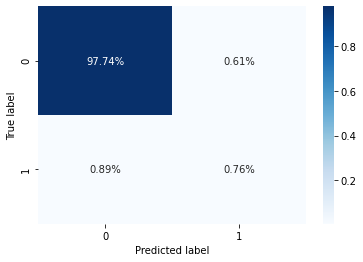

In [34]:
cfm_test2 = test2_results.detection_confusion_matrix()

In [35]:
test2_results.detection_result_metrics()

Detection performance metrics:

True negative: 11690
False positive: 73
False negative: 106
True positive: 91
True positive rate (TPR): 0.4619289340101523
True negative rate (TNR): 0.993794100144521
False positive rate (FPR): 0.006205899855479044
Precision: 0.5548780487804879
Accuracy: 0.9850334448160535
Balanced accuracy: 0.7278615170773366
F1 score: 0.5041551246537396
